Modelisation des donnees avec les algorithmes KNN, Decision Tree, Random Forest, Naive Bayes, Logistic Regression

Analyse exploratoire des données (EDA) avec les pandas dans le secteur bancaire

Importer des modules

In [44]:
#Importation des bibliothèques nécessaires 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
#plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

Chargement des données

In [45]:
df = pd.read_csv('data/bankfull.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
#la propriété T est utilisée pour transposer l'index et les colonnes#
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Examination la taille du jeu de données, les noms des fonctionnalités et leurs types

In [48]:
df.shape
#Le jeu de données contient 41188 objets (lignes), pour chacun desquels 21 entités sont définies (colonnes), 
#dont 1 entité cible (y).

(41188, 21)

Valeurs dupliquées

In [49]:
#suppression des valeurs en double
print(df.duplicated().sum()) 
df = df.drop_duplicates() 

12


In [50]:
#verification des valeurs en double
df.duplicated().sum()

0

Valeurs manquantes 

In [51]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Valeurs uniques

In [52]:
#verification des valeurs uniques
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Résumé concis de la base de données

In [53]:
# .info() la fonctionest utilisée pour obtenir un résumé concis de la trame de données. 
#Il est très pratique lors de l'analyse exploratoire des données.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Quelques observations de base :

* Nous avons des variables numériques et catégorielles;
* Nous avons 21 fonctionnalités;
* Le but est de prédire si une personne va s'inscrire (colonne cible 'y');
* C'est une classification binaire.

Visualization préliminaire des donnees

In [54]:
n = df.select_dtypes(include=['float64', 'int64'])
c= df.select_dtypes(exclude=['float64', 'int64'])

Age


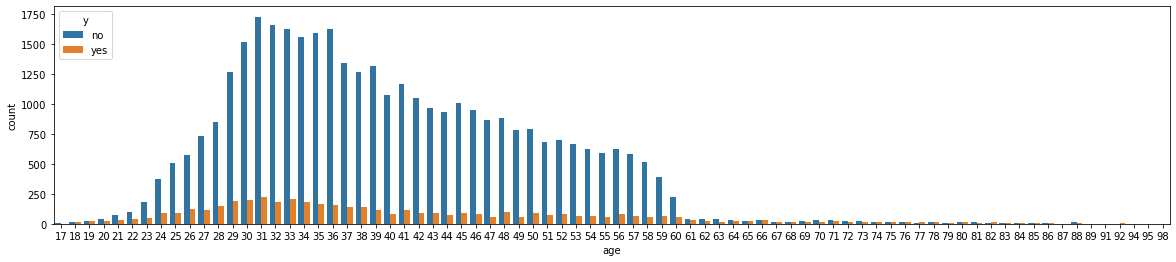

Duration


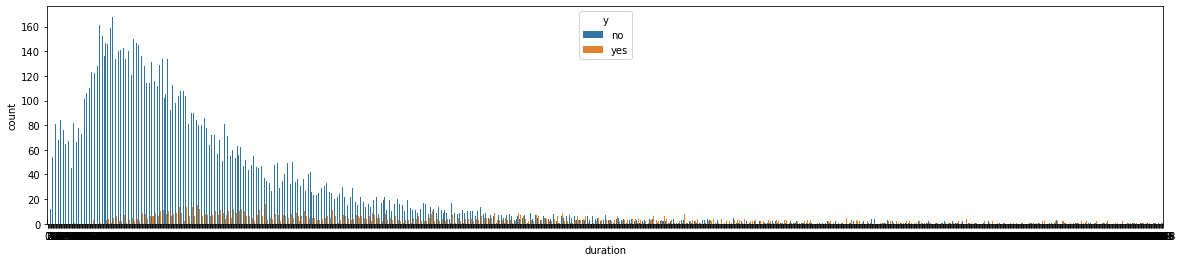

Campaign


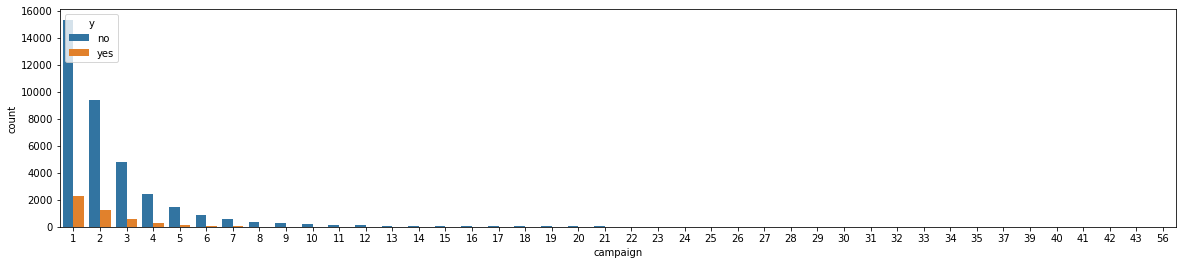

Pdays


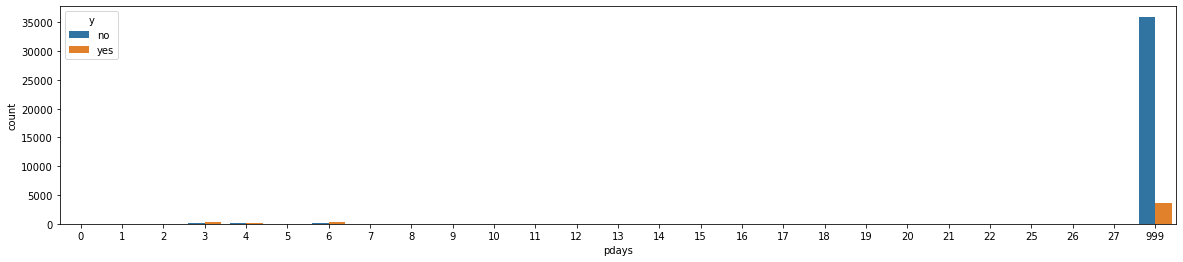

Previous


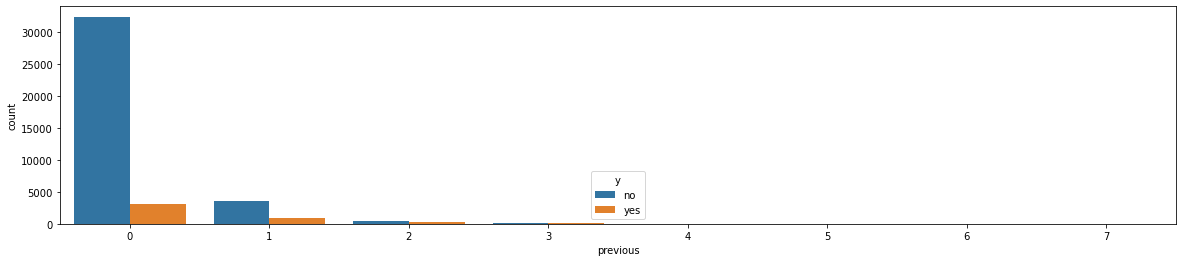

Emp.Var.Rate


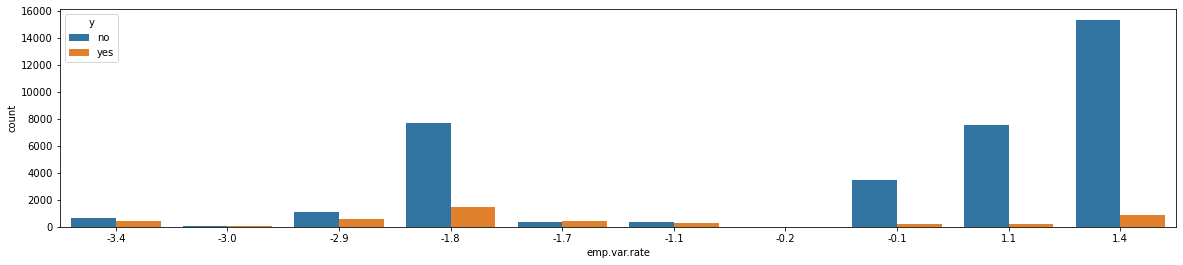

Cons.Price.Idx


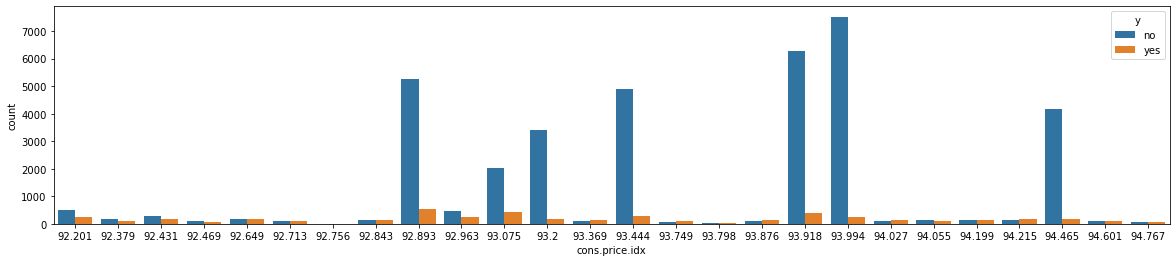

Cons.Conf.Idx


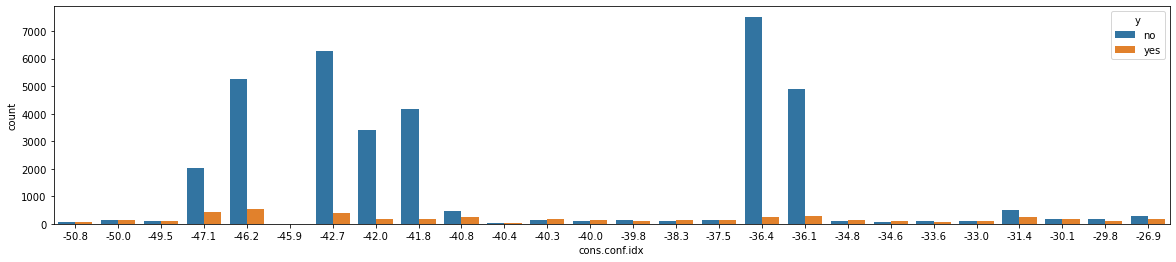

Euribor3M


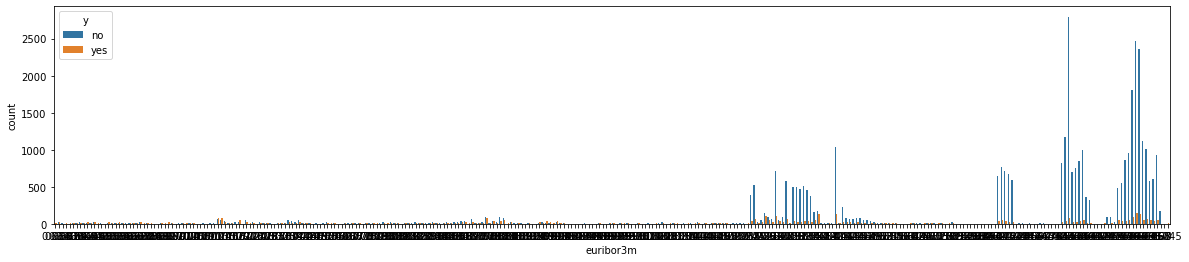

Nr.Employed


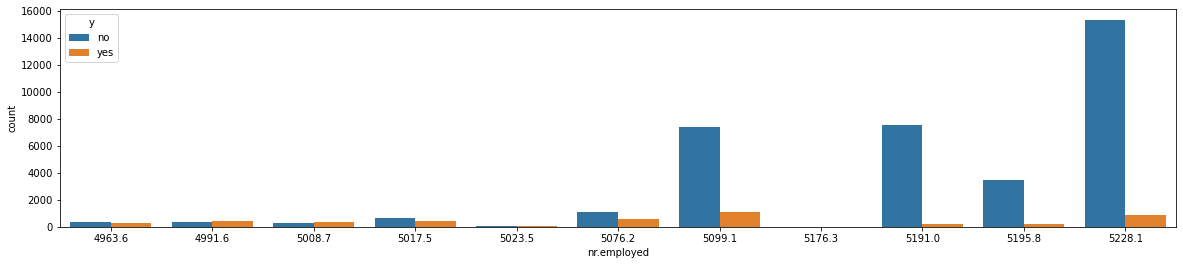

In [55]:
for i in n:
    plt.figure(figsize=(20, 4))
    print(i.title())
    sns.countplot(df[i], hue=df['y'])
    plt.show()

Job


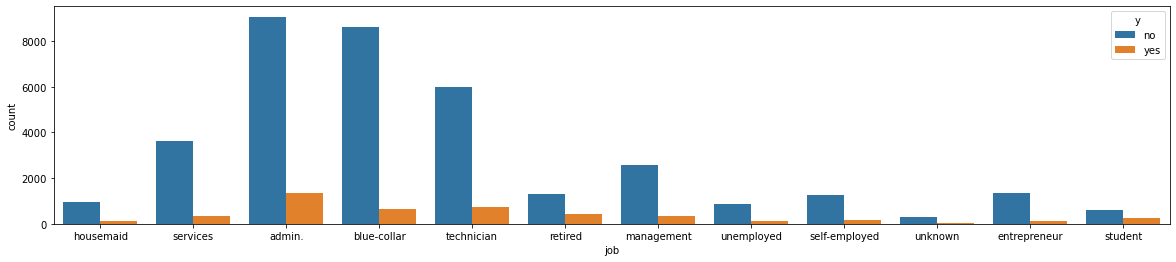

Marital


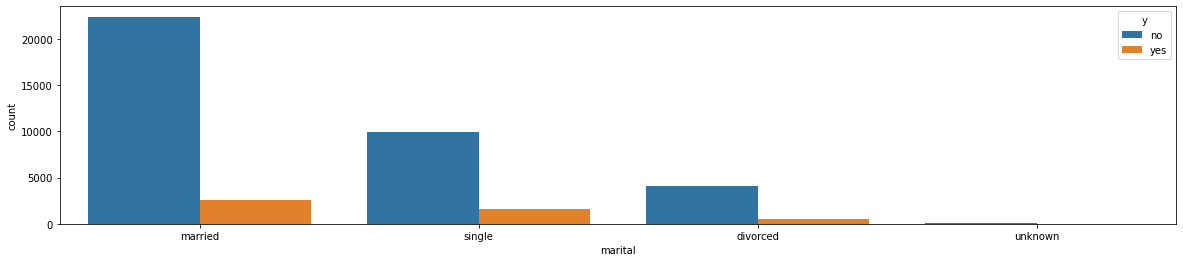

Education


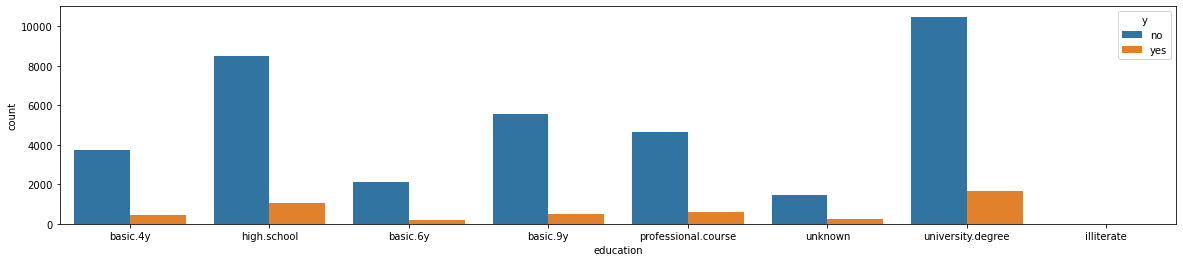

Default


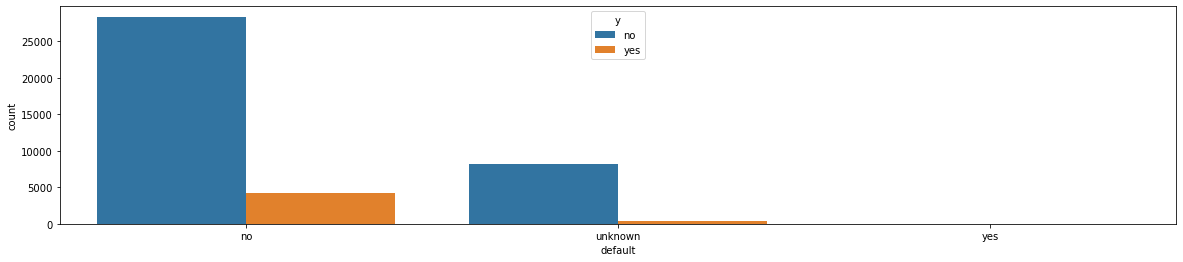

Housing


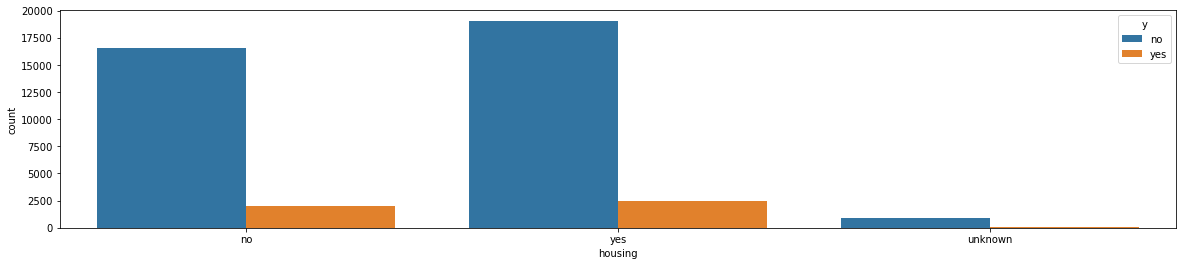

Loan


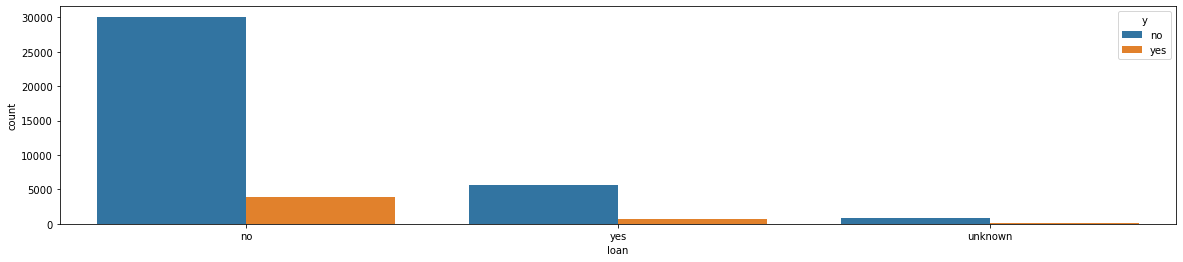

Contact


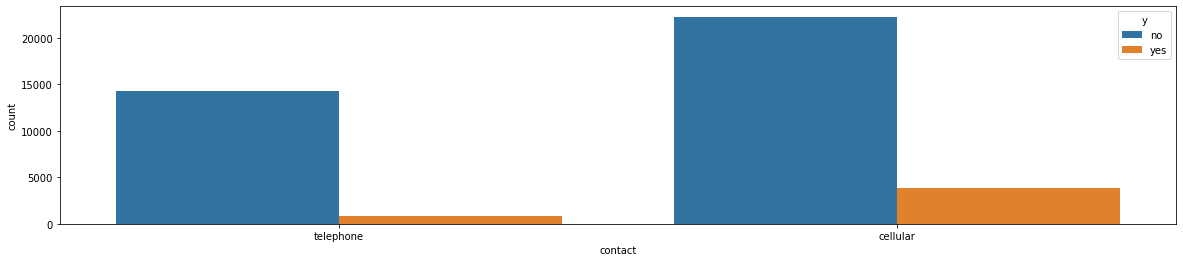

Month


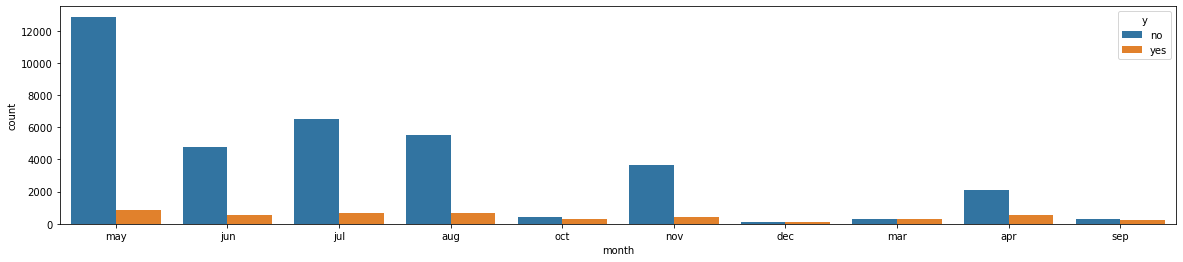

Day_Of_Week


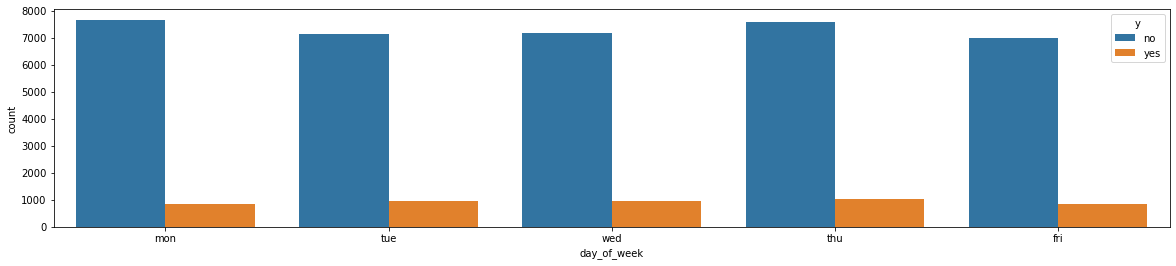

Poutcome


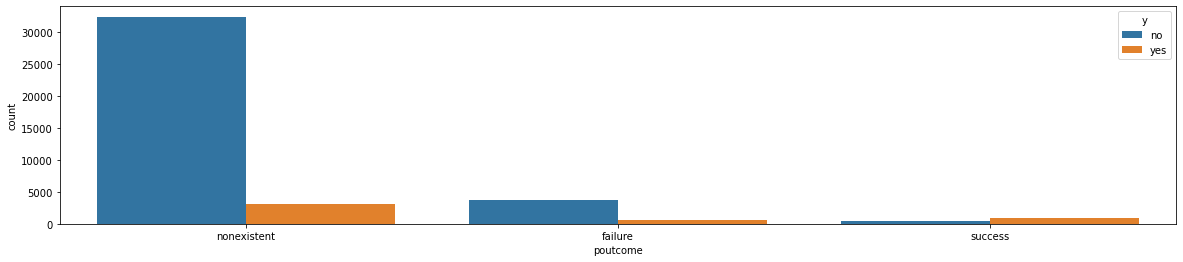

Y


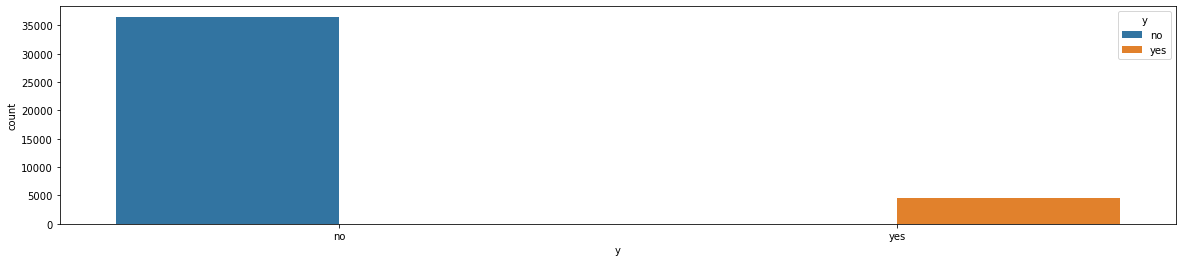

In [56]:
for i in c:
    plt.figure(figsize=(20, 4))
    print(i.title())
    sns.countplot(df[i], hue=df['y'])
    plt.show()

Histogramme pour les fonctionnalités toutes ensemble :

* Une analyse visuelle des histogrammes présentés nous permet de faire des hypothèses préliminaires à propos de la variabilité des données sources.

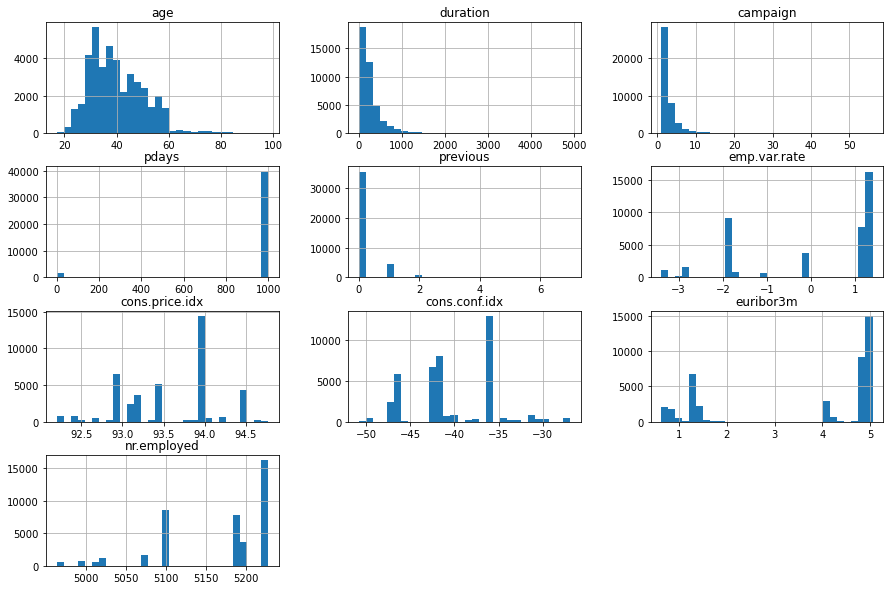

In [57]:
df.hist(bins = 30,figsize = (15, 10))
plt.show()

Vérification des colonnes numériques

In [58]:
for i in df.columns:
    #print()
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        print(f'Le nom de la colonne est: {i} et les valeurs uniques sont: {df[i].unique()}')

Le nom de la colonne est: age et les valeurs uniques sont: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Le nom de la colonne est: duration et les valeurs uniques sont: [ 261  149  226 ... 1246 1556 1868]
Le nom de la colonne est: campaign et les valeurs uniques sont: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Le nom de la colonne est: pdays et les valeurs uniques sont: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Le nom de la colonne est: previous et les valeurs uniques sont: [0 1 2 3 4 5 6 7]
Le nom de la colonne est: emp.var.rate et les valeurs uniques sont: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Le nom de la colonne est: cons.pric

Vérification des colonnes de catégorie

In [59]:
for i in df.columns:
    #print()
    if df[i].dtype == 'object':
         print(f'Le nom de la colonne est: {i} et les valeurs uniques sont: {df[i].unique()}')

Le nom de la colonne est: job et les valeurs uniques sont: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Le nom de la colonne est: marital et les valeurs uniques sont: ['married' 'single' 'divorced' 'unknown']
Le nom de la colonne est: education et les valeurs uniques sont: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Le nom de la colonne est: default et les valeurs uniques sont: ['no' 'unknown' 'yes']
Le nom de la colonne est: housing et les valeurs uniques sont: ['no' 'yes' 'unknown']
Le nom de la colonne est: loan et les valeurs uniques sont: ['no' 'yes' 'unknown']
Le nom de la colonne est: contact et les valeurs uniques sont: ['telephone' 'cellular']
Le nom de la colonne est: month et les valeurs uniques sont: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Le nom de la colonne est: day_of_week et

Valeurs manquantes masquées

In [60]:
#affichage de valeurs manquantes masquees 'unknown'
(df=='unknown').sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [61]:
(df=='unknown').mean()

age               0.000000
job               0.008014
marital           0.001943
education         0.042015
default           0.208762
housing           0.024043
loan              0.024043
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

Analyse et traitement de valeurs aberrantes

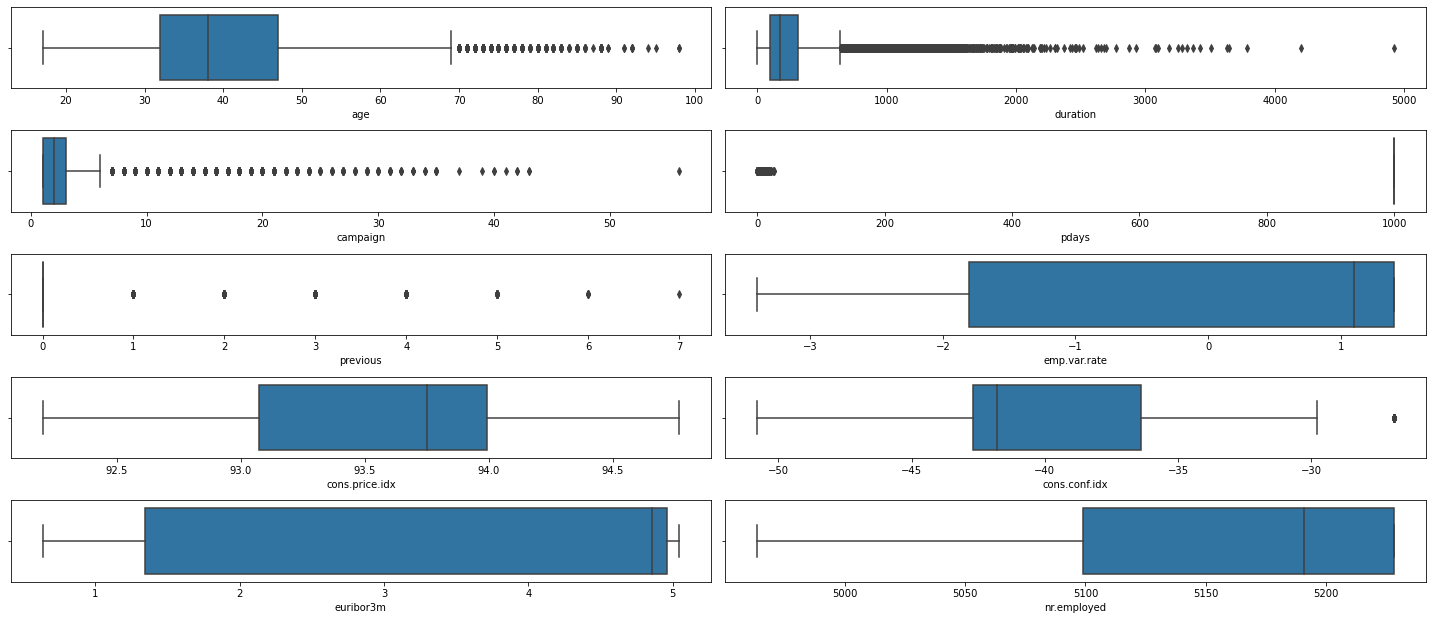

In [62]:
cc = 1 
nrows = round(len(n.columns) / 2) + 1
fig = plt.figure(figsize=(20,10))
for i in n.columns:
    plt.subplot(nrows, 2, cc)
    sns.boxplot(x=i, hue='y', data=df)
    cc += 1 
plt.tight_layout()
plt.show()

Traitement de valuer 'duration':
* duration: durée du dernier contact, en secondes (numérique).     

In [63]:
Q1 = df.duration.quantile(.25)
Q3 = df.duration.quantile(.75)  #(102.0, 319.0)

low_duration = Q1 - 1.5 * (Q3 - Q1)
upper_duration = Q3 + 1.5 * (Q3 - Q1)
df = df[df.duration >= low_duration] 
df = df[df.duration <= upper_duration]

Traitement de valuer 'campaign':
*  campaign : nombre de contacts effectués au cours de cette campagne et pour ce client (numérique, inclut le dernier contact)   

In [64]:
df[df.campaign > 50]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [65]:
df.drop(4107, inplace=True)

Traitement de valuer 'cons.conf.idx':
* cons.conf.idx :indice de confiance des consommateurs - indicateur mensuel (numérique)   

In [66]:
df[df['cons.conf.idx']> -27]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38154,50,management,married,university.degree,no,yes,no,cellular,oct,thu,...,2,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
38155,37,admin.,single,university.degree,no,yes,no,cellular,oct,thu,...,3,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
38156,59,technician,single,basic.6y,no,no,no,cellular,oct,thu,...,1,999,2,failure,-3.4,92.431,-26.9,0.754,5017.5,no
38158,35,admin.,married,high.school,no,yes,no,cellular,oct,thu,...,1,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
38159,35,admin.,married,high.school,no,no,no,cellular,oct,thu,...,1,4,2,success,-3.4,92.431,-26.9,0.754,5017.5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,retired,married,basic.4y,no,yes,yes,cellular,oct,fri,...,3,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38597,18,student,single,basic.6y,no,no,yes,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38598,59,retired,divorced,basic.4y,no,yes,no,telephone,oct,fri,...,4,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,no
38599,37,admin.,single,university.degree,no,no,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes


In [70]:
drop_conf_index=df[df['cons.conf.idx']> -27].index
df.drop(drop_conf_index,inplace=True)

Verification de resultats obtenus

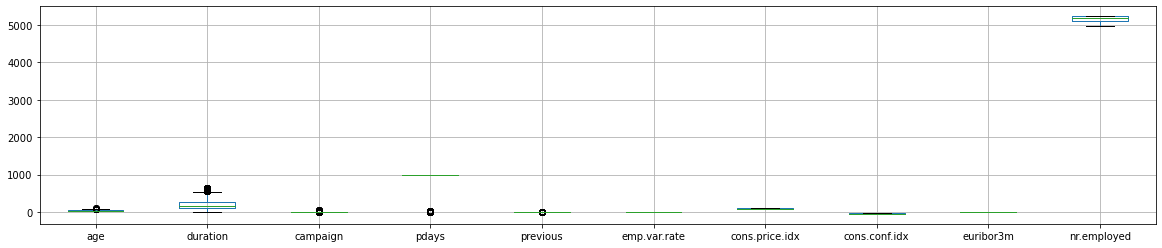

In [71]:
plt.figure(figsize=(20,4))
df.boxplot()
print()

In [72]:
df.shape

(37801, 21)

Il y avait 41188 lignes. Maintenant, nous avons 37801 lignes.

Corrélation

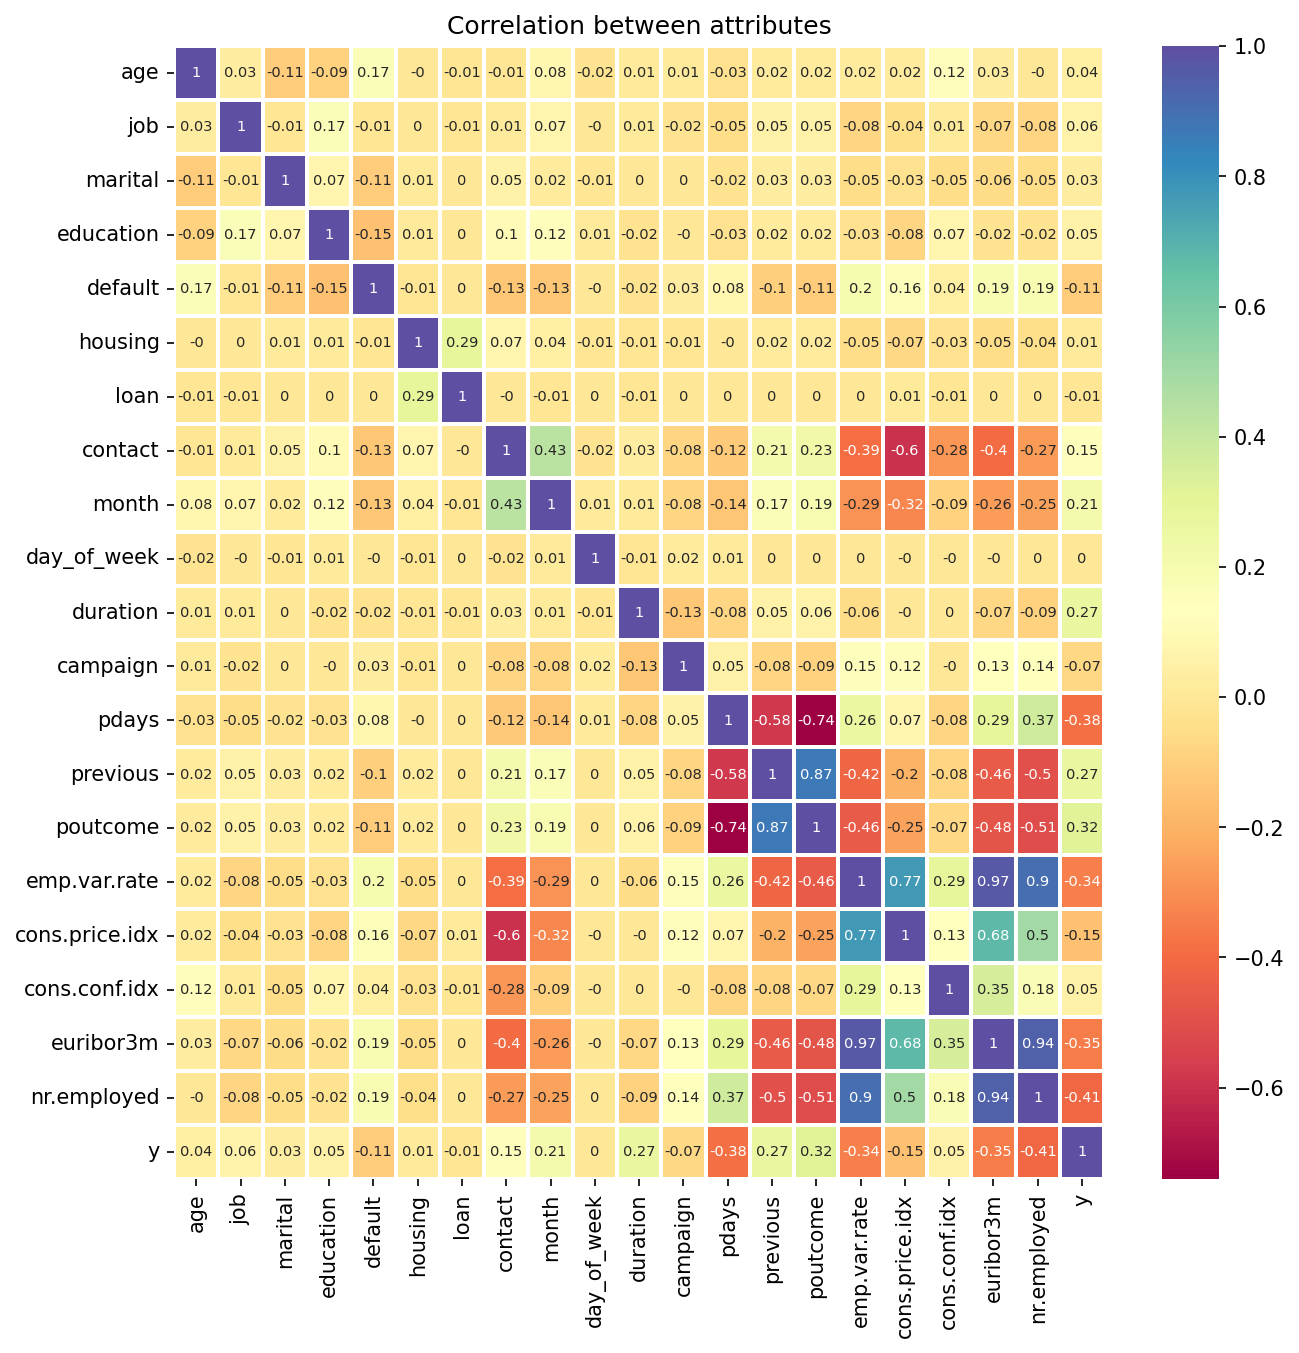

                     age       job   marital  education   default   housing  \
age             1.000000  0.029423 -0.114103  -0.090454  0.169724 -0.003521   
job             0.029423  1.000000 -0.008234   0.166622 -0.012582  0.003086   
marital        -0.114103 -0.008234  1.000000   0.066485 -0.106363  0.007474   
education      -0.090454  0.166622  0.066485   1.000000 -0.146166  0.011364   
default         0.169724 -0.012582 -0.106363  -0.146166  1.000000 -0.008414   
housing        -0.003521  0.003086  0.007474   0.011364 -0.008414  1.000000   
loan           -0.005780 -0.006695  0.001488   0.001461  0.003044  0.290168   
contact        -0.009618  0.013606  0.045545   0.097389 -0.132732  0.065567   
month           0.080283  0.073117  0.020699   0.116022 -0.130677  0.044163   
day_of_week    -0.017873 -0.001900 -0.007214   0.006303 -0.003902 -0.007710   
duration        0.011601  0.007649  0.004862  -0.022627 -0.015912 -0.011701   
campaign        0.007446 -0.016685  0.003320  -0.003

In [73]:
#Encoder l'objet en tant que type énuméré ou variable catégorielle.
#Cette méthode est utile pour obtenir une représentation numérique d'un 
#array quand tout ce qui compte est d'identifier des valeurs distinctes.

df2=df.copy()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df2[i]=pd.factorize(df[i])[0]

plt.figure(figsize=(10, 10),dpi=150)
plt.title('Correlation between attributes')
sns.heatmap(df2.corr().round(2),lw=1,linecolor='white',cmap='Spectral',annot=True, annot_kws={"size":7})  

plt.show()
corr_matrix = df2.corr()
print(corr_matrix)

Vérification de la colonne co-liée hautement

<AxesSubplot:>

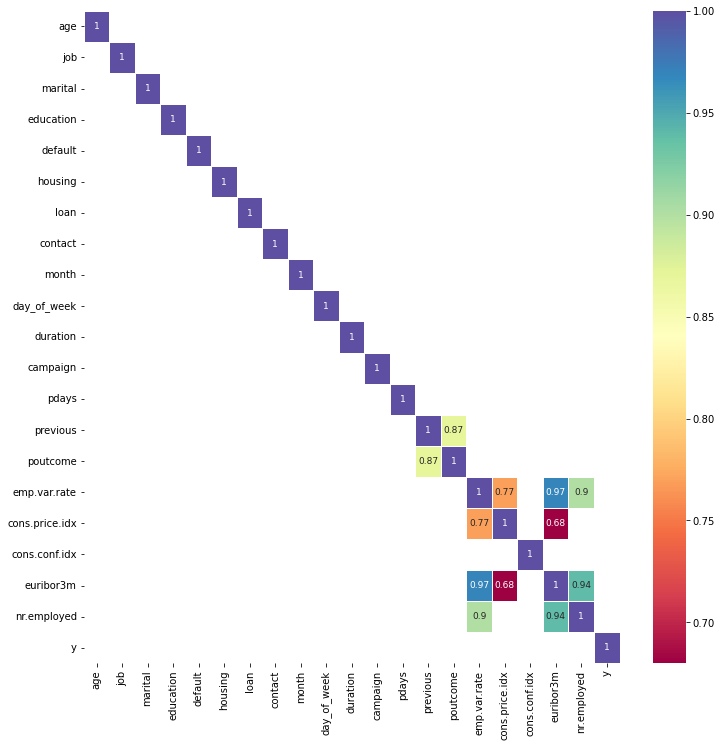

In [74]:
corr = df2.corr()
corr65 = corr[corr>=.65]
#Visualising by heatmap
plt.figure(figsize=(12,12))                #,dpi=100
sns.heatmap(corr65.round(2),lw=1,linecolor='white',cmap='Spectral',annot=True, annot_kws={"size":9})  


Interprétation:

D'après la carte thermique de corrélation ci-dessus, nous pouvons conclure que :

Les variables fortement corrélées positivement  sont:
*  poutcome(résultat de la campagne marketing précédente) et previous(nombre de contacts effectués avant cette campagne et pour ce client) ,coefficient de corrélation = 0,87;
*  cons.price.idx(indice des prix à la consommation, mensuel) et emp.var.rate(taux de variation de l'emploi , trimestriel) ,coefficient de corrélation =0.77;
*  euribor3m (taux euribor 3 mois,journalier) et  emp.var.rate(taux de variation de l'emploi , trimestriel), ,coefficient de corrélation =0.97;                                                                             
*  nr.employed(nombre d'employés,trimestriel) et emp.var.rate(taux de variation de l'emploi , trimestriel), coefficient de corrélation =0.9.                                                             

Vérification de la colonne co-liée faible

<AxesSubplot:>

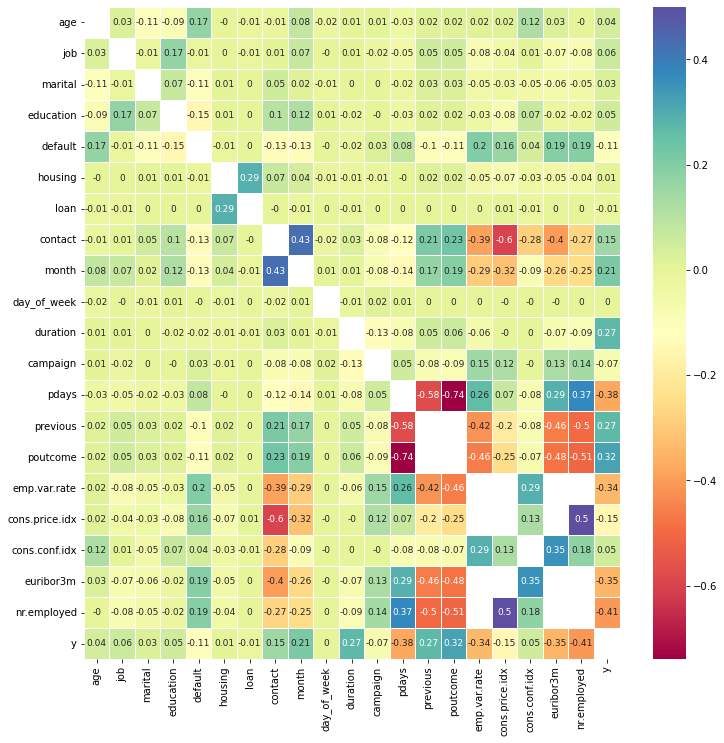

In [75]:
corr = df2.corr()
corr_low = corr[corr<.65]
#Visualising by heatmap
plt.figure(figsize=(12,12))                #,dpi=100
sns.heatmap(corr_low.round(2),lw=1,linecolor='white',cmap='Spectral',annot=True, annot_kws={"size":9})  

Interprétation:

D'après la carte thermique de corrélation ci-dessus, nous pouvons conclure que :

La classe cible est corrélée positivement faible avec: 
* job(genre de travail),coefficient de corrélation = 0,06;
* education(),coefficient de corrélation = 0,05;
* age(),marital(état civil), duration(durée du dernier contact, en secondes),coefficient de corrélation =0,03
* housing(a un prêt immobilier ?),coefficient de corrélation = 0,01;
* poutcome(résultat de la campagne marketing précédente) et previous(nombre de contacts effectués avant cette campagne et pour ce client),coefficient de corrélation = 0,3. 

Vérification de la colonne co-liée négativement

<AxesSubplot:>

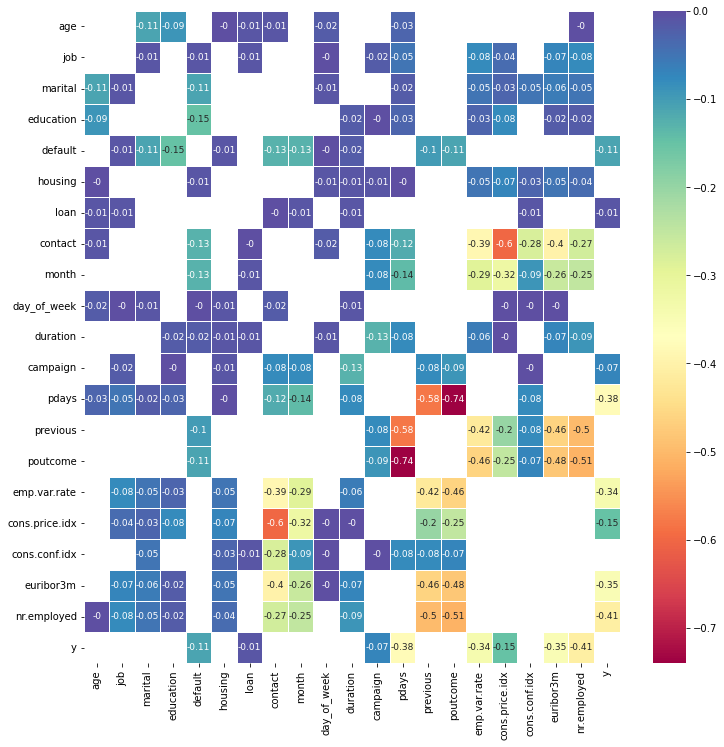

In [76]:
corr = df2.corr()
corr_negat = corr[corr<0]
#Visualising by heatmap
plt.figure(figsize=(12,12))                #,dpi=100
sns.heatmap(corr_negat.round(2),lw=1,linecolor='white',cmap='Spectral',annot=True, annot_kws={"size":9})  

Interprétation:

D'après la carte thermique de corrélation ci-dessus, nous pouvons conclure que :

La classe est corrélée negativement avec:
* default(a un crédit en défaut ?), coefficient de corrélation = -0,11;
* loan(a un prêt personnel?), coefficient de corrélation = -0,01;
* campaign(nombre de contacts effectués pendant cette campagne et pour ce client), coefficient de corrélation = -0,07;
* pdays(nombre de jours qui se sont écoulés depuis que le client a été contacté pour la dernière fois lors d'une campagne précédente), 
coefficient de corrélation = -0,38;
* emp.var.rate(taux de variation de l'emploi , trimestriel),coefficient de corrélation = -0,34.

 Visualisation des colonnes numériques

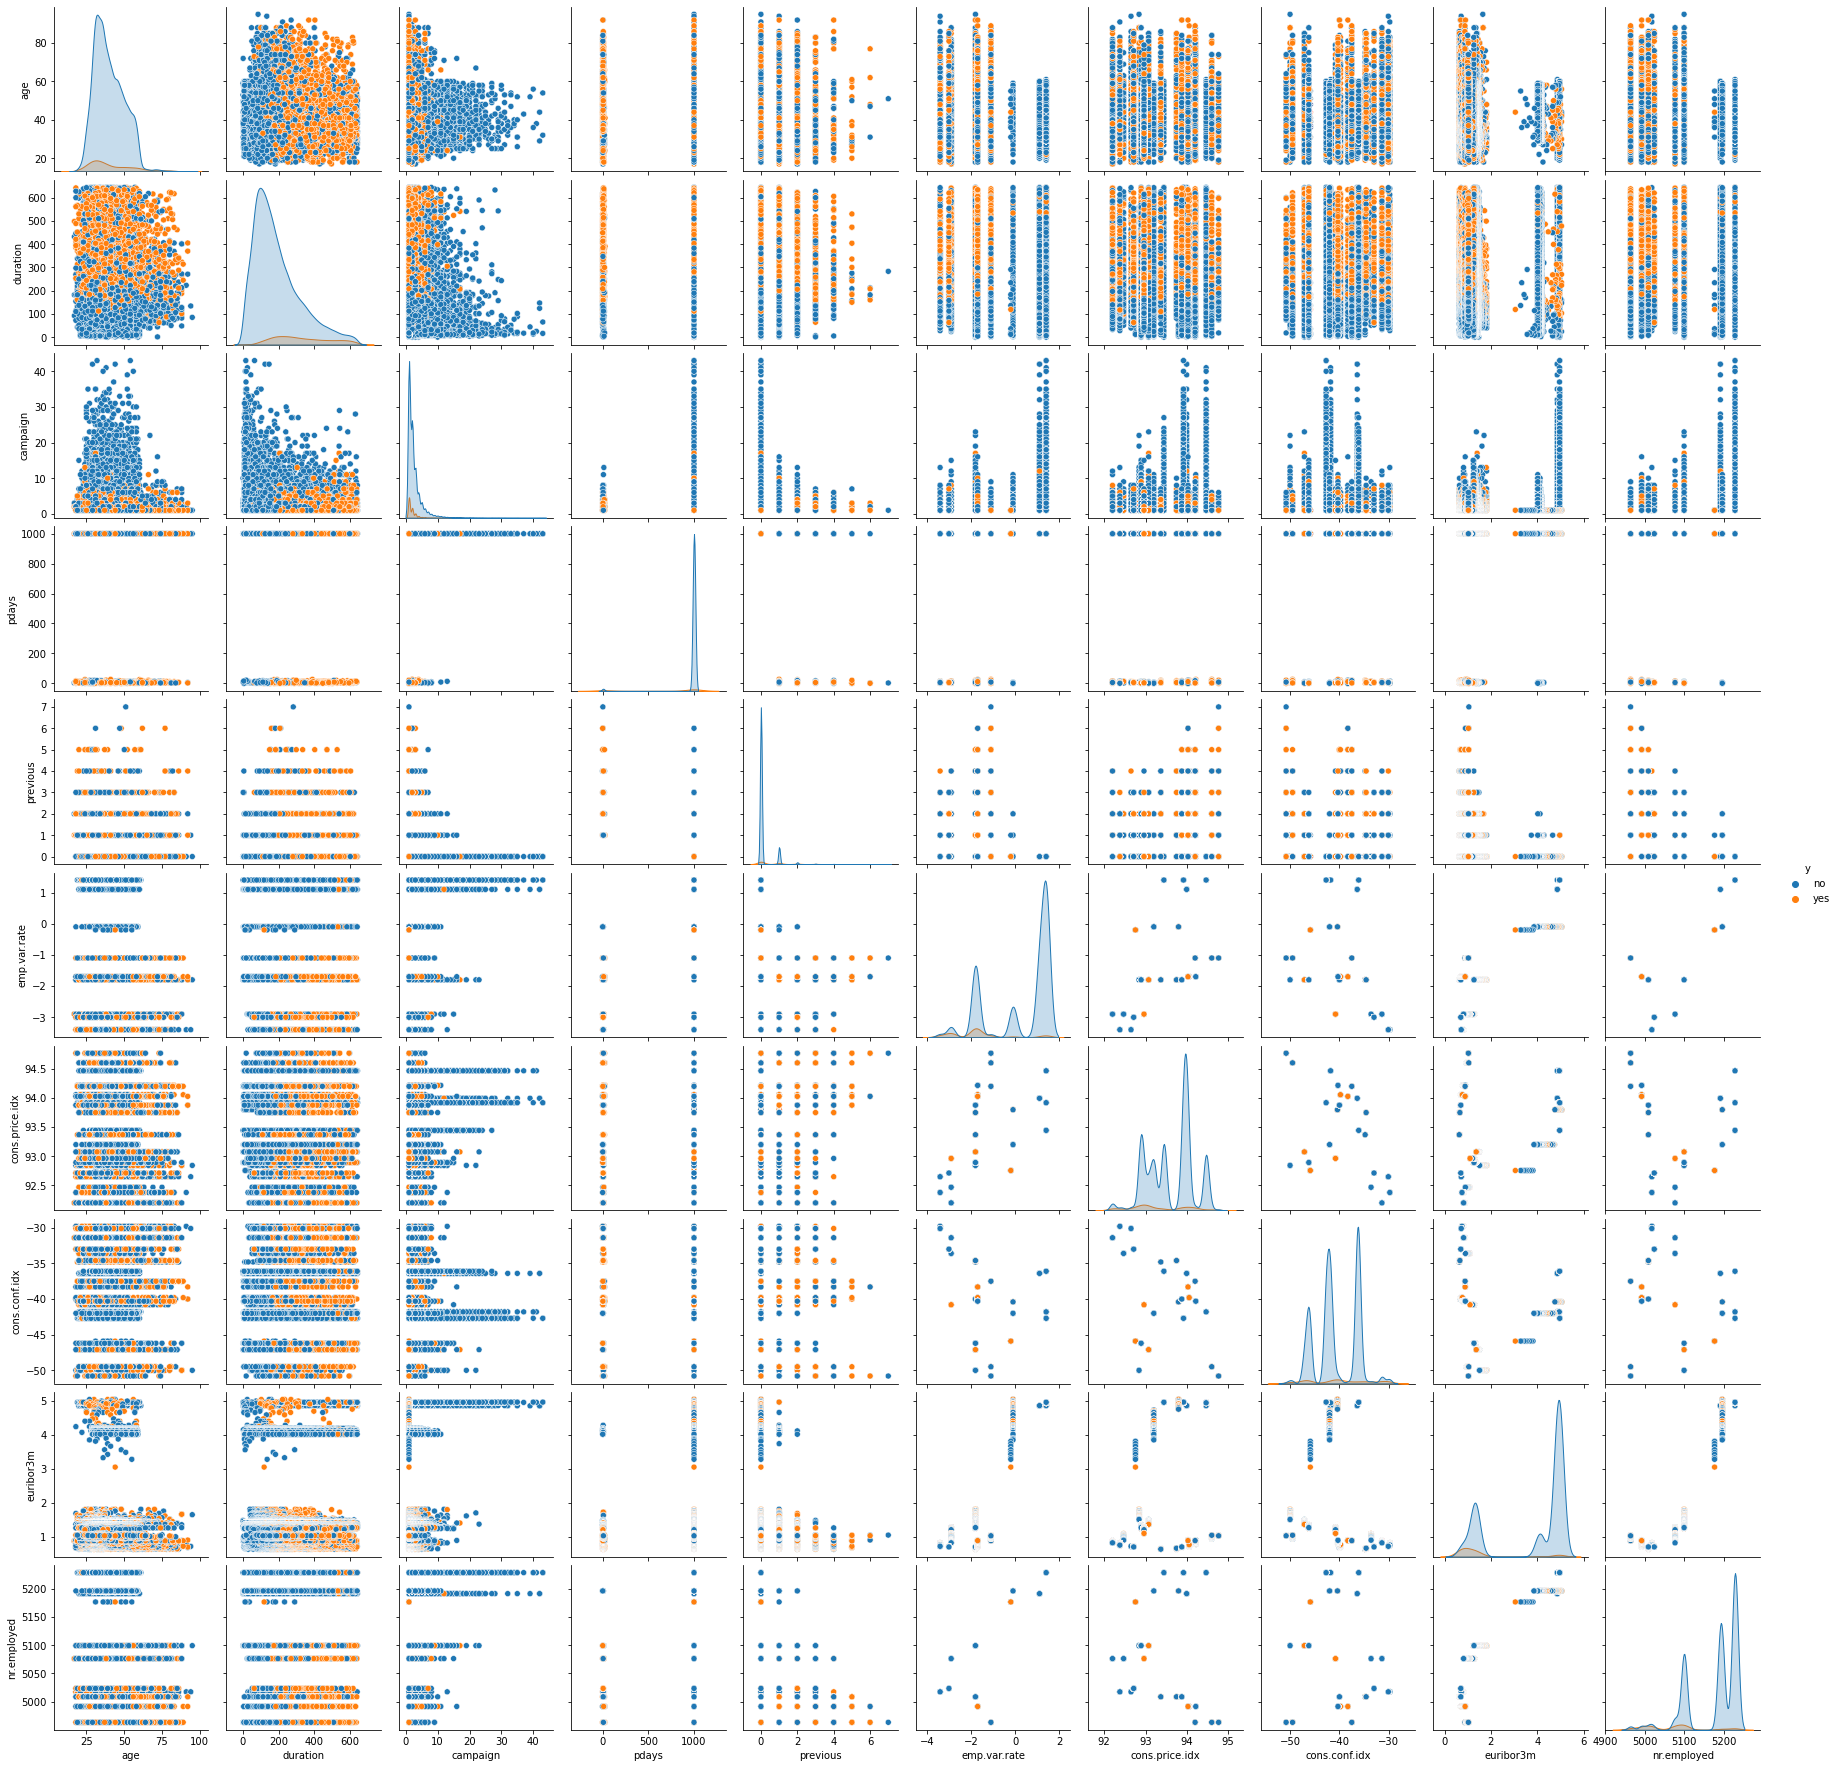

In [77]:
sns.pairplot(hue='y', data = df)
plt.show()

Équilibrage des données

In [78]:
df.y.value_counts(normalize=True)

no     0.921933
yes    0.078067
Name: y, dtype: float64

<AxesSubplot:xlabel='y', ylabel='count'>

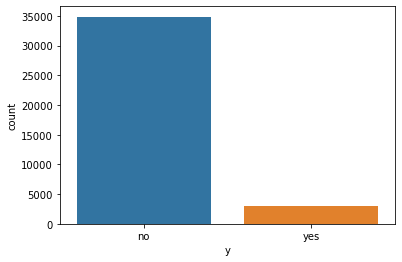

In [79]:
#Affichez le nombre d'observations dans chaque bac catégoriel à l'aide de barres.

sns.countplot(df.y)

In [80]:
df_maj = df[df.y=='no']
df_min = df[df.y=='yes']
df_maj.shape,df_min.shape

((34850, 21), (2951, 21))

Suréchantillonnage de la classe minoritaire

In [81]:
#resample() la fonction qui rééchantillonne les tableaux ou les matrices creuses de manière cohérente.
from sklearn.utils import resample
df_min_modif= resample(df_min, replace = True, n_samples = 34850,random_state = 150) 
df = pd.concat([df_maj, df_min_modif])
df.y.value_counts()

no     34850
yes    34850
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

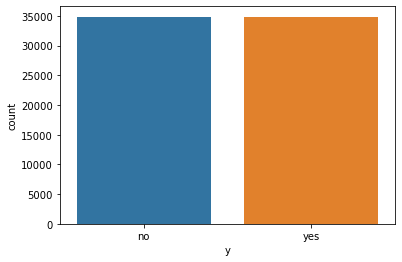

In [82]:
sns.countplot(df.y)

In [ ]:
#Enregistrement du jeu de données avec les données manipulées.
#df_balanced_data=df.to_csv('data/df_modified.csv', encoding = 'utf-8', index = False) #df2

Conversion en tant que colonnes d'objets en colonnes catégorielles

In [83]:
# Conversion en tant que colonnes d'objets en colonnes catégorielles
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category').cat.codes
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69700 entries, 0 to 34430
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             69700 non-null  int64  
 1   job             69700 non-null  int8   
 2   marital         69700 non-null  int8   
 3   education       69700 non-null  int8   
 4   default         69700 non-null  int8   
 5   housing         69700 non-null  int8   
 6   loan            69700 non-null  int8   
 7   contact         69700 non-null  int8   
 8   month           69700 non-null  int8   
 9   day_of_week     69700 non-null  int8   
 10  duration        69700 non-null  int64  
 11  campaign        69700 non-null  int64  
 12  pdays           69700 non-null  int64  
 13  previous        69700 non-null  int64  
 14  poutcome        69700 non-null  int8   
 15  emp.var.rate    69700 non-null  float64
 16  cons.price.idx  69700 non-null  float64
 17  cons.conf.idx   69700 non-null 

In [84]:
df.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
job,3.000,7.000,7.000,0.000,7.000
marital,1.000,1.000,1.000,1.000,1.000
education,0.000,3.000,3.000,1.000,3.000
default,0.000,1.000,0.000,0.000,0.000
housing,0.000,0.000,2.000,0.000,0.000
loan,0.000,0.000,0.000,0.000,2.000
contact,1.000,1.000,1.000,1.000,1.000
month,6.000,6.000,6.000,6.000,6.000
day_of_week,1.000,1.000,1.000,1.000,1.000


Prétraitement,Codage,Division(split)

In [85]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#encoding
df.y = LabelEncoder().fit_transform(df.y)

In [86]:
#Split
X = df.copy()
y = X.pop('y')

Imputation de valeurs manquantes masquees

In [87]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

Verification de valeurs manquantes

In [88]:
(df=='unknown').sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [89]:
(df=='unknown').mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Fractionner le dataframe (Train_test_split)

In [90]:
# Fractionner le dataframe en sous-ensembles d'entraînement et de test aléatoires
seed = 44
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

Verification de represantation dimensionnale

In [91]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((55760, 20), (13940, 20), (55760,), (13940,))

Mise à l'échelle et optimisation:

* La normalisation est un concept très important dans la mise à l'échelle des fonctionnalités qui fait partie intégrante de l'ingénierie des fonctionnalités.
* Lorsque collection des données pour l'analyse de données ou l'apprentissage automatique, nous aurons beaucoup de fonctionnalités, qui sont des fonctionnalités indépendantes.
* A l'aide des traits indépendants, nous essaierons de prédire le trait dépendant en apprentissage supervisé.
* Tout en voyant les données, il y aura plus de bruit dans les données, ce qui exposera le modèle au risque d'être influencé par les valeurs aberrantes.
* Donc pour cela, on va couramment normaliser ou standardiser les données.

In [92]:
#Standardisez les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Développement et formation des modèles

1. Modélisation avec Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score

nbg = GaussianNB().fit(X_train, y_train.ravel())
nbg_test_prd = nbg.predict(X_test)
nbg_train_prd = nbg.predict(X_train)

accuracy_nbg = metrics.accuracy_score(y_test, nbg_test_prd)
roc_test = roc_auc_score(y_test, nbg_test_prd , multi_class='ovr')
roc_train = roc_auc_score(y_train, nbg_train_prd, multi_class='ovr')
f1_nbg = f1_score(y_test, nbg_test_prd)
precision_nbg = precision_score(y_test, nbg_test_prd)
recall_nbg = recall_score(y_test, nbg_test_prd) 
print()
print("Matrice de confusion bayésienne naïve")
print("{0}".format(metrics.confusion_matrix(y_test, nbg_test_prd, labels = [1, 0])))
print()
print("Précision bayésienne naïve: {0:.4f}".format(accuracy_score(y_test, nbg_test_prd)))
print()
print("Rapport de classement bayésienne naïve")
print(metrics.classification_report(y_test, nbg_test_prd, labels = [1, 0]))


Matrice de confusion bayésienne naïve
[[5858 1224]
 [1462 5396]]

Précision bayésienne naïve: 0.8073

Rapport de classement bayésienne naïve
              precision    recall  f1-score   support

           1       0.80      0.83      0.81      7082
           0       0.82      0.79      0.80      6858

    accuracy                           0.81     13940
   macro avg       0.81      0.81      0.81     13940
weighted avg       0.81      0.81      0.81     13940



In [158]:
# calcule la précision nulle 
#C'est un bon moyen de connaître le minimum que nous devons atteindre avec nos modèles
max(y_test.mean(), 1 - y_test.mean())

0.5080344332855093

In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

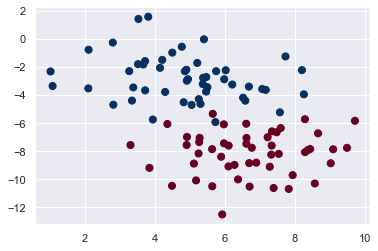

In [105]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=44, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [101]:
!pip install scikit-plot

In [144]:
#!pip install pandas_ml

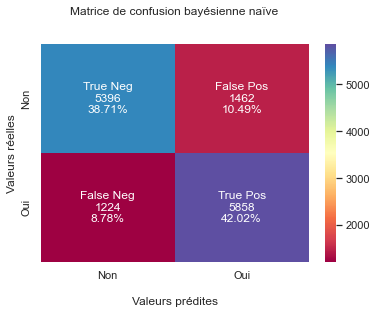

In [143]:
from sklearn.metrics import confusion_matrix

#Générer la matrice de confusion
cf_matrix = confusion_matrix(y_test, nbg_test_prd)
#print(cf_matrix)
import seaborn as sns
tags = ['True Neg','False Pos','False Neg','True Pos']

tags_num = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

tags_prcnt = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(tags,tags_num,tags_prcnt)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,cmap='Spectral',annot=labels, fmt='')

ax.set_title('Matrice de confusion bayésienne naïve\n\n');
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs réelles');

## Étiquettes de billets - La liste doit être en ordre alphabétique
ax.xaxis.set_ticklabels(['Non','Oui'])
ax.yaxis.set_ticklabels(['Non','Oui'])

## Affiche la visualisation de la matrice de confusion.
plt.show()

Métriques calculées à partir d'une matrice de confusion

In [162]:
#Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?
print(metrics.accuracy_score(y_test, nbg_test_prd))

#Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?
print(1 - metrics.accuracy_score(y_test, nbg_test_prd))

#Sensibilité/Recall : lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.recall_score(y_test, nbg_test_prd))

#Spécificité : lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ?
#specificity = TN / (TN + FP)=78,68%

#Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?
#print(1 - specificity)=21,32%

#Précision : lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.precision_score(y_test, nbg_test_prd))

0.8073170731707318
0.19268292682926824
0.8271674668172833
0.8002732240437158


Interpretation:

1.  Vrais positifs (TP) : nous avons correctement prédit que le client souscrira un dépôt à terme;
2.  Vrais négatifs (VN) : nous avons correctement prédit que le client ne souscrira pas un dépôt à terme;
3.  Faux positifs (FP) : nous avons prédit à tort que le client souscrira un dépôt à terme (une « erreur de type I »);
4.  Faux négatifs (FN) : nous avons prédit à tort que  le client ne souscrira pas un dépôt à terme (une « erreur de type II »).    
    
    
 
*  Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?  80,73%
*  Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?  19,27%
    
*  (FN)Sensibilité/Recall (a maximizer): lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ? 82,72%
*  (FP)Spécificité (a maximizer): lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ? 78,68%
*  Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?  21,32%   
*  (FP)Précision (a maximizer): lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ? 80%   

Evaluation de la  performances d'un modèle sur un ensemble de données

In [180]:
#Pour évaluer les performances d'un modèle sur un ensemble de données, 
#nous devons mesurer dans quelle mesure les prédictions faites par le modèle correspondent aux données observées.
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, r2_score, classification_report
k_fold = KFold(n_splits=10, shuffle=True, random_state=44)
perfo_nbg=cross_val_score(nbg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print()
print("Précision moyenne bayésienne naïve",(cross_val_score(nbg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))


Précision moyenne bayésienne naïve 0.8093974175035867


2. Modélisation avec Régression logistique

In [122]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', random_state = 44).fit(X_train, y_train)
#Prédictions et Évaluation de notre modèle
lr_test_prd= lr.predict(X_test)
lr_train_prd= lr.predict(X_train)

roc_test = roc_auc_score(y_test, lr_test_prd, multi_class='ovr')
roc_train = roc_auc_score(y_train, lr_train_prd, multi_class='ovr')
f1_lr = f1_score(y_test, lr_test_prd)
precision_lr = precision_score(y_test, lr_test_prd)
recall_lr = recall_score(y_test, lr_test_prd) 
accuracy_lr = metrics.accuracy_score(y_test, lr_test_prd)

print()
print("Matrice de confusion de la Régression logistique")
print("{0}".format(metrics.confusion_matrix(y_test, lr_test_prd, labels = [1, 0])))
print()
print("Précision de Régression logistique : {0:.4f}".format(accuracy_score(y_test, lr_test_prd)))
print()
print("Rapport de classement de Régression logistique")
print(metrics.classification_report(y_test, lr_test_prd, labels = [1, 0]))


Matrice de confusion de Régression logistique
[[6218  864]
 [ 987 5871]]

Précision de Régression logistique : 0.8672

Rapport de classement de Régression logistique
              precision    recall  f1-score   support

           1       0.86      0.88      0.87      7082
           0       0.87      0.86      0.86      6858

    accuracy                           0.87     13940
   macro avg       0.87      0.87      0.87     13940
weighted avg       0.87      0.87      0.87     13940



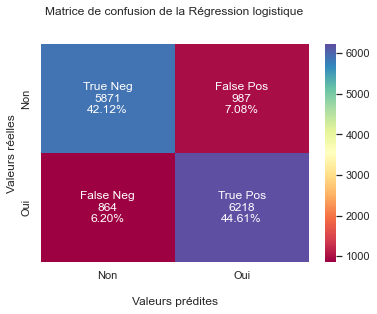

In [152]:
from sklearn.metrics import confusion_matrix

#Générer la matrice de confusion
cf_matrix = confusion_matrix(y_test, lr_test_prd)
#print(cf_matrix)
import seaborn as sns
tags = ['True Neg','False Pos','False Neg','True Pos']

tags_num = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

tags_prcnt = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(tags,tags_num,tags_prcnt)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,cmap='Spectral',annot=labels, fmt='')

ax.set_title('Matrice de confusion de la Régression logistique\n\n');
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs réelles');

## Étiquettes de billets - La liste doit être en ordre alphabétique
ax.xaxis.set_ticklabels(['Non','Oui'])
ax.yaxis.set_ticklabels(['Non','Oui'])

## Affiche la visualisation de la matrice de confusion.
plt.show()

Métriques calculées à partir d'une matrice de confusion

In [163]:
#Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?
print(metrics.accuracy_score(y_test, lr_test_prd))

#Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?
print(1 - metrics.accuracy_score(y_test, lr_test_prd))

#Sensibilité/Recall : lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.recall_score(y_test, lr_test_prd))

#Spécificité : lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ?
#specificity = TN / (TN + FP)=85,61%

#Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?
#print(1 - specificity)=14,39%

#Précision : lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.precision_score(y_test,lr_test_prd))

0.8672166427546628
0.13278335724533719
0.8780005648121999
0.8630117973629424


Interpretation:

1.  Vrais positifs (TP) : nous avons correctement prédit que le client souscrira un dépôt à terme;
2. Vrais négatifs (VN) : nous avons correctement prédit que le client ne souscrira pas un dépôt à terme;
3. Faux positifs (FP) : nous avons prédit à tort que le client souscrira un dépôt à terme (une « erreur de type I »);
4. Faux négatifs (FN) : nous avons prédit à tort que  le client ne souscrira pas un dépôt à terme (une « erreur de type II »).    
 

*  Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?  86,72%
*  Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?  13,28%
    
*  (FN)Sensibilité/Recall (a maximizer): lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ? 87,8%
*  (FP)Spécificité (a maximizer): lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ? 85.61%
*  Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?  14,39%   
*  (FP)Précision (a maximizer): lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ? 86,30%   

Evaluation de la  performances d'un modèle sur un ensemble de données

In [179]:
#Pour évaluer les performances d'un modèle sur un ensemble de données, 
#nous devons mesurer dans quelle mesure les prédictions faites par le modèle correspondent aux données observées.
k_fold = KFold(n_splits=10, shuffle=True, random_state=44)
perfo_lr=cross_val_score(lr, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print()
print("Précision moyenne de la Régression logistique",(cross_val_score(lr, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))


Précision moyenne de la Régression logistique 0.8721484935437591


3. Modélisation avec Forêt aléatoire(Random Forest)

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=2019).fit(X_train, y_train)
rfc_test_prd= rfc.predict(X_test)
rfc_train_prd = rfc.predict(X_train)

roc_test = roc_auc_score(y_test, rfc_test_prd, multi_class='ovr')
roc_train = roc_auc_score(y_train, rfc_train_prd, multi_class='ovr')
f1_rfc = f1_score(y_test, rfc_test_prd)
precision_rfc = precision_score(y_test, rfc_test_prd)
recall_rfc = recall_score(y_test, rfc_test_prd) 
accuracy_rfc = metrics.accuracy_score(y_test, rfc_test_prd)
print()
print("Matrice de confusion du Forêt aléatoire")
print("{0}".format(metrics.confusion_matrix(y_test, rfc_test_prd, labels = [1, 0])))
print()
print("Précision du Forêt aléatoire : {0:.4f}".format(accuracy_score(y_test, rfc_test_prd)))
print()
print("Rapport de classement de Forêt aléatoire")
print(metrics.classification_report(y_test, rfc_test_prd, labels = [1, 0]))


Matrice de confusion de Forêt aléatoire
[[7082    0]
 [ 249 6609]]

Précision du Forêt aléatoire : 0.9821

Rapport de classement de Forêt aléatoire
              precision    recall  f1-score   support

           1       0.97      1.00      0.98      7082
           0       1.00      0.96      0.98      6858

    accuracy                           0.98     13940
   macro avg       0.98      0.98      0.98     13940
weighted avg       0.98      0.98      0.98     13940



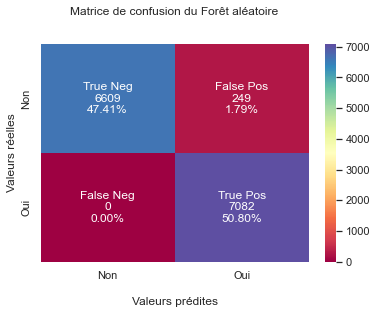

In [153]:
from sklearn.metrics import confusion_matrix

#Générer la matrice de confusion
cf_matrix = confusion_matrix(y_test, rfc_test_prd)
#print(cf_matrix)
import seaborn as sns
tags = ['True Neg','False Pos','False Neg','True Pos']

tags_num = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

tags_prcnt = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(tags,tags_num,tags_prcnt)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,cmap='Spectral',annot=labels, fmt='')

ax.set_title('Matrice de confusion du Forêt aléatoire\n\n');
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs réelles');

## Étiquettes de billets - La liste doit être en ordre alphabétique
ax.xaxis.set_ticklabels(['Non','Oui'])
ax.yaxis.set_ticklabels(['Non','Oui'])

## Affiche la visualisation de la matrice de confusion.
plt.show()

Métriques calculées à partir d'une matrice de confusion

In [164]:
#Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?
print(metrics.accuracy_score(y_test, rfc_test_prd))

#Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?
print(1 - metrics.accuracy_score(y_test, rfc_test_prd))

#Sensibilité/Recall : lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.recall_score(y_test, rfc_test_prd))

#Spécificité : lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ?
#specificity = TN / (TN + FP)=96,36%

#Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?
#print(1 - specificity)=3,64%

#Précision : lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.precision_score(y_test,rfc_test_prd))

0.9821377331420373
0.01786226685796266
1.0
0.9660346473878052


Interpretation:

1. Vrais positifs (TP) : nous avons correctement prédit que le client souscrira un dépôt à terme;
2. Vrais négatifs (VN) : nous avons correctement prédit que le client ne souscrira pas un dépôt à terme;
3.  Faux positifs (FP) : nous avons prédit à tort que le client souscrira un dépôt à terme (une « erreur de type I »);
4. Faux négatifs (FN) : nous avons prédit à tort que  le client ne souscrira pas un dépôt à terme (une « erreur de type II »).    
 

*  Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ? 98,21%
*  Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?  1,79%
    
*  (FN)Sensibilité/Recall (a maximizer): lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ? 100%
*  (FP)Spécificité (a maximizer): lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ? 96,36%
*  Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?  3,64%   
*  (FP)Précision (a maximizer): lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ? 96,60%   

Evaluation de la performances d'un modèle sur un ensemble de données

In [174]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=44)
perfo_rfc=cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print()
print("Précision moyenne du Forêt aléatoire",(cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))


Précision moyenne du Forêt aléatoire 0.9797883787661407


4. Modélisation avec l'Arbre de décision(Decission Tree)

In [124]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier().fit(X_train, y_train)
dtc_test_prd = dtc.predict(X_test)
dtc_train_prd = dtc.predict(X_train)

accuracy_dtc = accuracy_score(y_test, dtc_test_prd)
accuracy_train_dtc =  accuracy_score(y_train,dtc_train_prd)
roc_test = roc_auc_score(y_test, dtc_test_prd, multi_class='ovr')
roc_train = roc_auc_score(y_train, dtc_train_prd, multi_class='ovr')
f1_dtc = f1_score(y_test, dtc_test_prd)
precision_dtc = precision_score(y_test, dtc_test_prd)
recall_dtc = recall_score(y_test, dtc_test_prd) 

print()
print("Matrice de confusion de l'Arbre de décision")
print("{0}".format(metrics.confusion_matrix(y_test, dtc_test_prd , labels = [1, 0])))
print()
print("Précision de l'Arbre de décision : {0:.4f}".format(accuracy_score(y_test, dtc_test_prd)))

print()
print("Rapport de classement de l'Arbre de décision")
print(metrics.classification_report(y_test, dtc_test_prd , labels = [1, 0]))


Matrice de confusion de l'Arbre de décision
[[7082    0]
 [ 324 6534]]

Précision de l'Arbre de décision : 0.9768

Rapport de classement de l'Arbre de décision
              precision    recall  f1-score   support

           1       0.96      1.00      0.98      7082
           0       1.00      0.95      0.98      6858

    accuracy                           0.98     13940
   macro avg       0.98      0.98      0.98     13940
weighted avg       0.98      0.98      0.98     13940



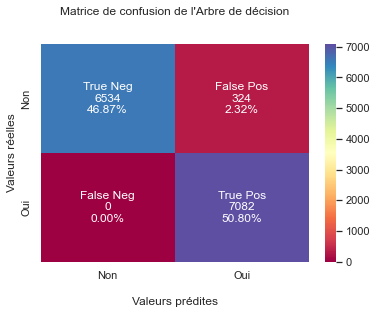

In [155]:
from sklearn.metrics import confusion_matrix

#Générer la matrice de confusion
cf_matrix = confusion_matrix(y_test, dtc_test_prd)
#print(cf_matrix)
import seaborn as sns
tags = ['True Neg','False Pos','False Neg','True Pos']

tags_num = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

tags_prcnt = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(tags,tags_num,tags_prcnt)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,cmap='Spectral',annot=labels, fmt='')

ax.set_title("Matrice de confusion de l'Arbre de décision\n\n");
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs réelles');

## Étiquettes de billets - La liste doit être en ordre alphabétique
ax.xaxis.set_ticklabels(['Non','Oui'])
ax.yaxis.set_ticklabels(['Non','Oui'])

## Affiche la visualisation de la matrice de confusion.
plt.show()

Métriques calculées à partir d'une matrice de confusion

In [166]:
#Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?
print(metrics.accuracy_score(y_test, dtc_test_prd))

#Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?
print(1 - metrics.accuracy_score(y_test, dtc_test_prd))

#Sensibilité/Recall : lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.recall_score(y_test, dtc_test_prd))

#Spécificité : lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ?
#specificity = TN / (TN + FP)=95,28%

#Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?
#print(1 - specificity)=4,72%

#Précision : lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.precision_score(y_test,dtc_test_prd))

0.9767575322812052
0.02324246771879479
1.0
0.9562516878206859


Interpretation:

1.  Vrais positifs (TP) : nous avons correctement prédit que le client souscrira un dépôt à terme;
2. Vrais négatifs (VN) : nous avons correctement prédit que le client ne souscrira pas un dépôt à terme;
3. Faux positifs (FP) : nous avons prédit à tort que le client souscrira un dépôt à terme (une « erreur de type I »);
4. Faux négatifs (FN) : nous avons prédit à tort que  le client ne souscrira pas un dépôt à terme (une « erreur de type II »).    
 

*  Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ? 97,67%
*  Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?  2,32%
    
*  (FN)Sensibilité/Recall (a maximizer): lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ? 100%
*  (FP)Spécificité (a maximizer): lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ? 95,28%
*  Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?  4,72%   
*  (FP)Précision (a maximizer): lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ? 95,62%   

Evaluation de la performances d'un modèle sur un ensemble de données

In [181]:
#Pour évaluer les performances d'un modèle sur un ensemble de données, 
#nous devons mesurer dans quelle mesure les prédictions faites par le modèle correspondent aux données observées.
k_fold = KFold(n_splits=10, shuffle=True, random_state=44)
perfo_dtc=cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print()
print("Précision moyenne de l'Arbre de décision",(cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))


Précision moyenne de l'Arbre de décision 0.9752331420373027


Visualiser un arbre de décision

In [54]:
#https://mljar.com/blog/visualize-decision-tree/
texto_repres = tree.export_text(dtc)
print(texto_repres)

with open("decistion_tree.log", "w") as dtc_texto:
    dtc_texto.write(texto_repres)

|--- feature_18 <= 0.25
|   |--- feature_19 <= -0.40
|   |   |--- feature_10 <= -0.81
|   |   |   |--- feature_10 <= -1.25
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  -1.25
|   |   |   |   |--- feature_12 <= -2.43
|   |   |   |   |   |--- feature_16 <= 0.91
|   |   |   |   |   |   |--- feature_0 <= -1.52
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -1.52
|   |   |   |   |   |   |   |--- feature_4 <= 1.05
|   |   |   |   |   |   |   |   |--- feature_18 <= -0.98
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.55
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  0.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  1.55
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- featur

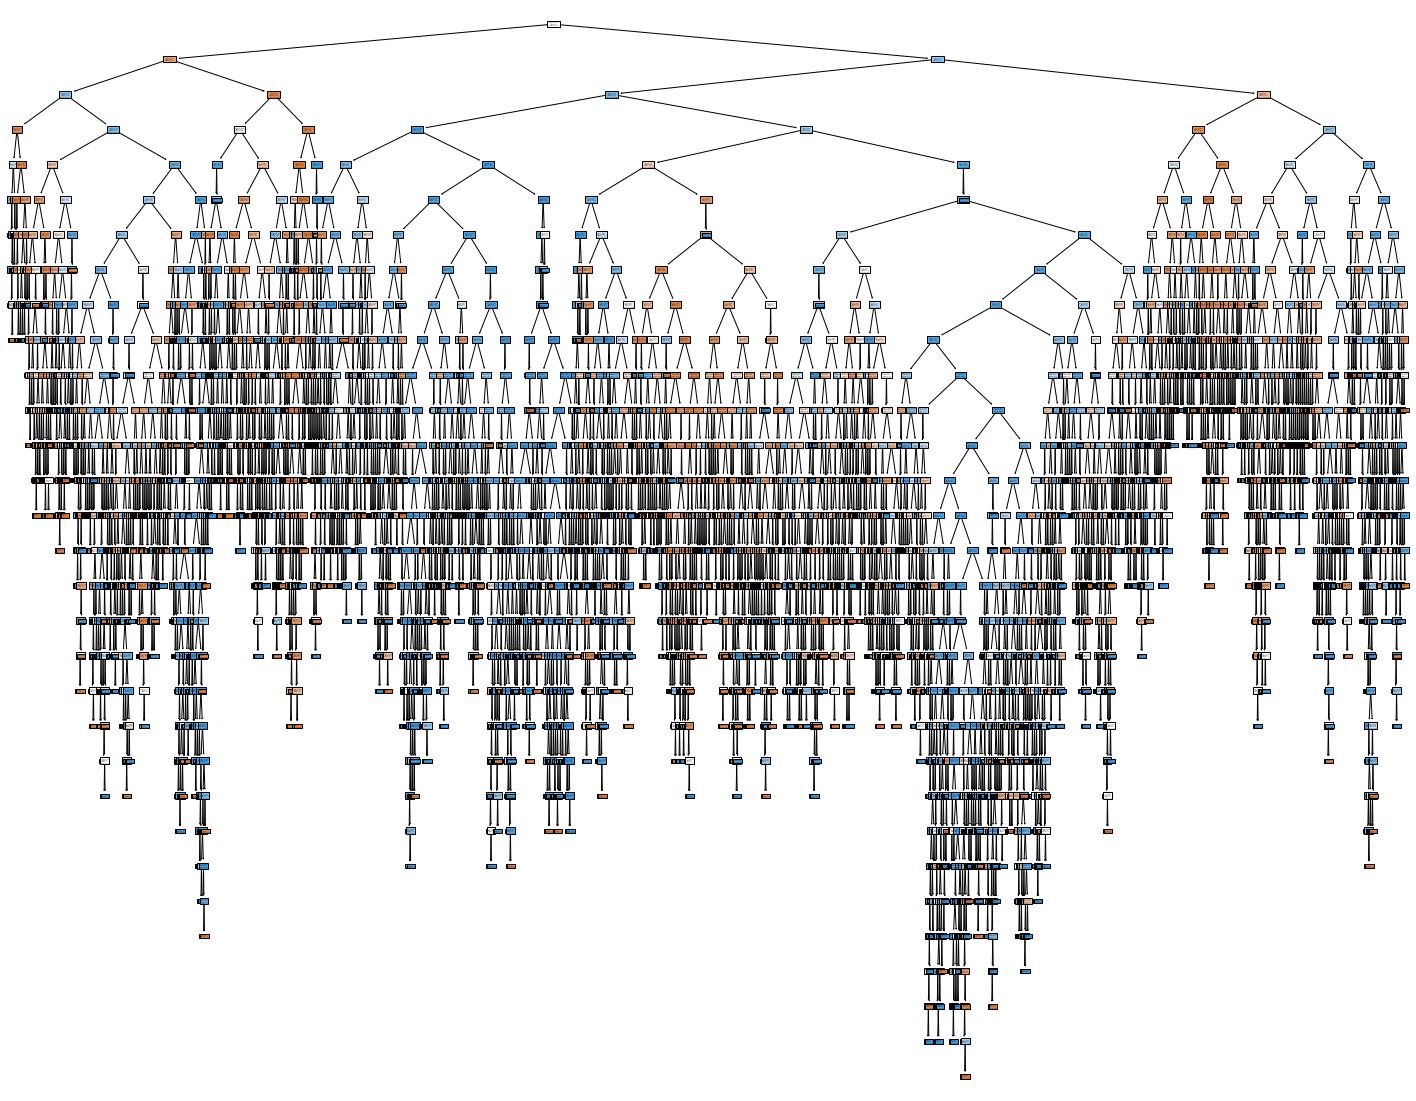

In [58]:
fig = plt.figure(figsize=(25,20))  #plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtc,filled=True) 
                 
fig.savefig("decistion_tree.png")                  

Text(0.5, 0, 'Importance relative')

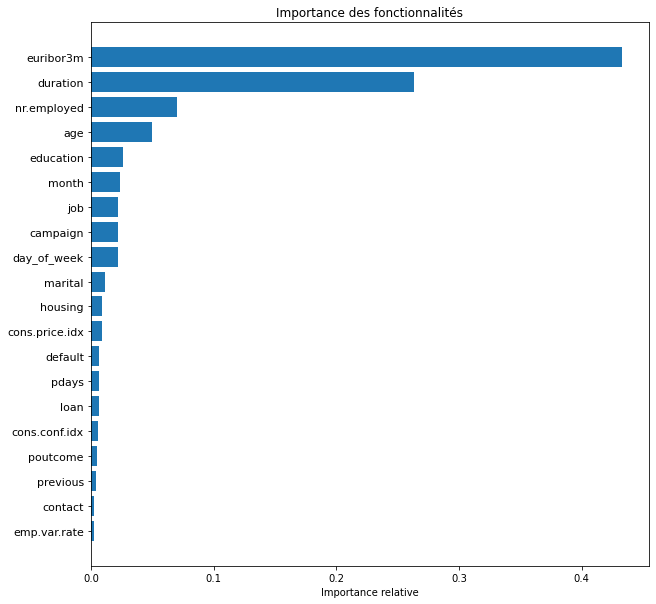

In [96]:
features=X.columns
i =dtc.feature_importances_
ind = np.argsort(i) 

plt.figure(figsize=(10,10))
plt.title('Importance des fonctionnalités')
plt.barh(range(len(ind)),i[ind], align='center')
plt.yticks(range(len(ind)), features[ind],fontsize= 11)
plt.xlabel('Importance relative')

5. Modélisation avec KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_test_prd= knn.predict(X_test)
knn_train_prd = knn.predict(X_train)

roc_test = roc_auc_score(y_test, knn_test_prd, multi_class='ovr')
roc_train = roc_auc_score(y_train, knn_train_prd, multi_class='ovr')
f1_knn = f1_score(y_test, knn_test_prd)
precision_knn = precision_score(y_test, knn_test_prd)
recall_knn = recall_score(y_test, knn_test_prd) 
accuracy_knn = metrics.accuracy_score(y_test, knn_test_prd)
print()
print("Matrice de confusion de KNN")
print("{0}".format(metrics.confusion_matrix(y_test, knn_test_prd, labels = [1, 0])))
print()
print("Précision de KNN : {0:.4f}".format(accuracy_score(y_test, knn_test_prd)))
print()
print("Rapport de classement de KNN")
print(metrics.classification_report(y_test, knn_test_prd, labels = [1, 0]))


Matrice de confusion de KNN
[[7059   23]
 [ 734 6124]]

Précision de KNN : 0.9457

Rapport de classement de KNN
              precision    recall  f1-score   support

           1       0.91      1.00      0.95      7082
           0       1.00      0.89      0.94      6858

    accuracy                           0.95     13940
   macro avg       0.95      0.94      0.95     13940
weighted avg       0.95      0.95      0.95     13940



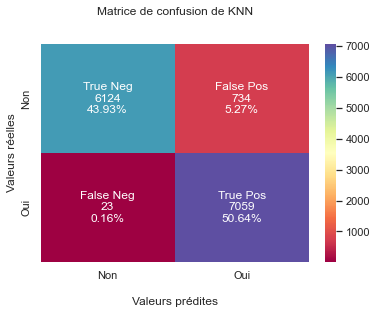

In [156]:
from sklearn.metrics import confusion_matrix

#Générer la matrice de confusion
cf_matrix = confusion_matrix(y_test, knn_test_prd)
#print(cf_matrix)
import seaborn as sns
tags = ['True Neg','False Pos','False Neg','True Pos']

tags_num = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

tags_prcnt = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(tags,tags_num,tags_prcnt)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,cmap='Spectral',annot=labels, fmt='')

ax.set_title('Matrice de confusion de KNN\n\n');
ax.set_xlabel('\nValeurs prédites')
ax.set_ylabel('Valeurs réelles');

## Étiquettes de billets - La liste doit être en ordre alphabétique
ax.xaxis.set_ticklabels(['Non','Oui'])
ax.yaxis.set_ticklabels(['Non','Oui'])

## Affiche la visualisation de la matrice de confusion.
plt.show()

Métriques calculées à partir d'une matrice de confusion

In [167]:
#Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ?
print(metrics.accuracy_score(y_test, knn_test_prd))

#Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?
print(1 - metrics.accuracy_score(y_test, knn_test_prd))

#Sensibilité/Recall : lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.recall_score(y_test, knn_test_prd))

#Spécificité : lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ?
#specificity = TN / (TN + FP)=89,29%

#Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?
#print(1 - specificity)=10,71%

#Précision : lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ?
print(metrics.precision_score(y_test,knn_test_prd))

0.9456958393113343
0.054304160688665726
0.9967523298503248
0.9058129090209162


Interpretation:

1.  Vrais positifs (TP) : nous avons correctement prédit que le client souscrira un dépôt à terme;
2. Vrais négatifs (VN) : nous avons correctement prédit que le client ne souscrira pas un dépôt à terme;
3. Faux positifs (FP) : nous avons prédit à tort que le client souscrira un dépôt à terme (une « erreur de type I »);
4. Faux négatifs (FN) : nous avons prédit à tort que  le client ne souscrira pas un dépôt à terme (une « erreur de type II »).    
 

*  Précision de la classification(Accuracy) : Dans l'ensemble, à quelle fréquence le classificateur est-il correct ? 94,60%
*  Erreur de classification : dans l'ensemble, à quelle fréquence le classificateur est-il incorrect ?  5,43%
    
*  (FN)Sensibilité/Recall (a maximizer): lorsque la valeur réelle est positive, à quelle fréquence la prédiction est-elle correcte ? 99,67%
*  (FP)Spécificité (a maximizer): lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle correcte ? 89,29%
*  Taux de faux positifs : Lorsque la valeur réelle est négative, à quelle fréquence la prédiction est-elle incorrecte ?  10,71%   
*  (FP)Précision (a maximizer): lorsqu'une valeur positive est prédite, à quelle fréquence la prédiction est-elle correcte ? 90,58%   

Evaluation de la performances d'un modèle sur un ensemble de données

In [182]:
#Pour évaluer les performances d'un modèle sur un ensemble de données, 
#nous devons mesurer dans quelle mesure les prédictions faites par le modèle correspondent aux données observées.
k_fold = KFold(n_splits=10, shuffle=True, random_state=44)
perfo_knn=cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print("Précision moyenne de KNN",(cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))

Précision moyenne de KNN 0.9420373027259684


Comparer et évaluer des modèles

In [185]:
# Résumé du tableau pour une meilleure visualisation
classifications_results = pd.DataFrame([
    {'Algorithm' : 'KNN', 'Accuracy' : accuracy_knn*100, "Performance ": perfo_knn*100,'F-score' : f1_knn*100, "Precision" :precision_knn*100,"Recall": recall_knn*100},
    {'Algorithm' : 'Naive Bayes', 'Accuracy' : accuracy_nbg*100, "Performance ": perfo_nbg*100, 'F-score' : f1_nbg*100, "Precision" :precision_nbg*100,"Recall": recall_nbg*100},
    {'Algorithm' : 'Regression logistique', 'Accuracy' : accuracy_lr *100, "Performance ": perfo_lr*100,'F-score' : f1_lr*100, "Precision" :precision_lr*100,"Recall": recall_lr*100},
    {'Algorithm' : 'Forêt aléatoire', 'Accuracy' : accuracy_rfc*100, "Performance ": perfo_rfc*100,'F-score' : f1_rfc*100, "Precision" :precision_rfc*100,"Recall": recall_rfc*100},
    {'Algorithm' : "Arbre de décision", 'Accuracy' : accuracy_dtc*100, "Performance ": perfo_dtc*100,'F-score' : f1_dtc*100, "Precision" :precision_dtc*100,"Recall": recall_dtc*100},
    ]) 

classifications_results.sort_values(by=['Accuracy'], ascending=False) #, ignore_index=False

,Algorithm,Accuracy,Performance,F-score,Precision,Recall
3,Forêt aléatoire,98.213773,97.564562,98.272393,96.603465,100.000000
4,Arbre de décision,97.675753,97.537661,97.763666,95.625169,100.000000
0,KNN,94.569584,94.203730,94.910924,90.581291,99.675233
2,Regression logistique,86.721664,87.214849,87.044166,86.301180,87.800056
1,Naive Bayes,80.731707,80.939742,81.349813,80.027322,82.716747


Resume:
    
* Random Forest est le modèle qui a obtenu la meilleure précision, avec 98,21 %. 

* Ce sera le modèle utilisé pour prédire si le client pourra ou non signer un dépôt à terme. 

* Le modèle sera enregistré et prêt à faire des prédictions.

Faire des prédictions avec le modèle formé

In [108]:
#pickle est un moyen sérialisé de stocker une frame de données Pandas
import pickle
# Enregistrer le modèle
rfc_file_name = 'rfc.sav'
pickle.dump(dtc, open(rfc_file_name, 'wb'))

In [113]:
result = pickle.load(open(rfc_file_name, 'rb')).predict(X_test)
#creation de l'échantillon aléatoire pour tester le modèle forme
result[:500]

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [117]:
df_rfc=df.y
rfc_1500=df_rfc[:1500]  #les 1500 premières lignes

pred_rfc = rfc.predict(X_test)

df_test=pd.DataFrame({'real': rfc_1500, 'prediction':pred_rfc[:1500]})
df_test.head()

,real,prediction
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Combien de prédictions sont identiques ou différentes des vraies dans les 1500 premières lignes?

In [118]:
print(df_test[df_test['real'] == df_test['prediction']].value_counts())
print(df_test[df_test['real'] != df_test['prediction']].value_counts())

real  prediction
0     0             665
dtype: int64
real  prediction
0     1             835
dtype: int64


Essai de classement

In [120]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Mettre toutes les variables nécessaires pour le test de classification, sauf la variable cible (y).

In [132]:
classification_test_ = np.array([[25,3,1,0,0,0,0,2,4,1,20,1,999,0,1,1,96,-56,4,5191]])
rfc.predict(classification_test)

array([0], dtype=int64)

In [133]:
classification_test = np.array([[25,3,1,0,0,0,0,2,4,1,20,1,999,0,1,1,96,-56,4,5191]])
nbg.predict(classification_test)

array([1], dtype=int64)

In [134]:
classification_test = np.array([[25,3,1,0,0,0,0,2,4,1,20,1,999,0,1,1,96,-56,4,5191]])
lr.predict(classification_test)

array([0], dtype=int64)

In [135]:
classification_test = np.array([[25,3,1,0,0,0,0,2,4,1,20,1,999,0,1,1,96,-56,4,5191]])
dtc.predict(classification_test)

array([0], dtype=int64)

In [136]:
classification_test = np.array([[25,3,1,0,0,0,0,2,4,1,20,1,999,0,1,1,96,-56,4,5191]])
knn.predict(classification_test)

array([1], dtype=int64)

Conclusion:

*  À partir des modèles presents, il sera possible de prédire si le client souscrira ou non un dépôt à terme, en plaçant toutes les variables nécessaires au test de classification ;   
* Le Random Forest est le modèle qui a obtenu la meilleure précision, avec 98,21 % et le resultat de la prediction est que le client ne souscrira pas un dépôt à terme;
* L'arbre de décision est le modèle qui a obtenu la  précisiond de 97,67 % et le resultat de la prediction est que le client ne souscrira pas un dépôt à terme;
* La regression logistique  est le modèle qui a obtenu la précision de 86,74 % et le resultat de la prediction est que le client ne souscrira pas un dépôt à terme;
* Le KNN est le modèle qui a obtenu la  précision de 94,57 % et le resultat de la prediction est que le client ne souscrira pas un dépôt à terme;
* Le Naive Bayes est le modèle qui a obtenu la  précision de 80,73 % et le resultat de la prediction est que le client souscrira un dépôt à terme.